In [33]:
from auxiliary.data.dataset_ht import HtDataset
from auxiliary.data import imaging
from auxiliary import values as v
from auxiliary.utils.colors import bcolors as bc

from nuclei_segmentation.processing import postprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

plt.style.use('default')

In [14]:
results = pd.read_csv(v.data_path + 'SegQA/Segmentation/Nuclei/QC_CROP/Stats/results.csv')
results

,test_name,dice,jaccard,#cells,correct,missing,over_segmented,under_segmented,confused
0,pipeline_3D_prob_0.0_flow_0.2_0_0,0.564833,0.622597,116.0,65.52,12.07,5.17,29.31,0.00
1,pipeline_3D_prob_0.0_flow_0.2_0_1,0.524975,0.607488,126.0,71.43,9.41,4.76,22.22,1.59
2,pipeline_3D_prob_0.0_flow_0.2_0_2,0.563642,0.567091,131.0,64.89,3.41,4.58,27.48,3.05
3,pipeline_3D_prob_0.0_flow_0.2_0_3,0.512041,0.598560,115.0,72.17,14.97,5.22,22.61,0.00
4,pipeline_3D_prob_0.0_flow_0.2_0_4,0.527047,0.559566,116.0,63.79,10.92,5.17,31.03,0.00
...,...,...,...,...,...,...,...,...,...
1035,pipeline_2D_thr_0.6_flow_0.6_3_3,0.614948,0.615201,193.0,41.45,1.73,39.90,11.40,7.25
1036,pipeline_2D_thr_0.6_flow_0.6_4_0,0.539558,0.567933,126.0,61.11,2.42,7.94,27.78,3.17
1037,pipeline_2D_thr_0.6_flow_0.6_4_1,0.573412,0.552190,127.0,59.06,2.34,8.66,27.56,4.72
1038,pipeline_2D_thr_0.6_flow_0.6_4_2,0.547319,0.599310,168.0,45.83,5.20,30.95,13.69,9.52


In [15]:
results = pd.read_csv(v.data_path + 'SegQA/Segmentation/Nuclei/QC_CROP/Stats/results.csv')
cols_to_adjust = results.columns[4:]

for col in cols_to_adjust:
    results[col] = (((results[col] * results['#cells']) / 100) / 188)
    
results['labels_ratio'] = results['#cells'] / 188
    
# for col in cols_to_adjust:
#     results[col] = results[col] / 100
    
results.to_csv(v.data_path + 'SegQA/Segmentation/Nuclei/QC_CROP/Stats/results_adjusted.csv', index=False)
results

,test_name,dice,jaccard,#cells,correct,missing,over_segmented,under_segmented,confused,labels_ratio
0,pipeline_3D_prob_0.0_flow_0.2_0_0,0.564833,0.622597,116.0,0.404272,0.074474,0.031900,0.180849,0.000000,0.617021
1,pipeline_3D_prob_0.0_flow_0.2_0_1,0.524975,0.607488,126.0,0.478733,0.063067,0.031902,0.148921,0.010656,0.670213
2,pipeline_3D_prob_0.0_flow_0.2_0_2,0.563642,0.567091,131.0,0.452159,0.023761,0.031914,0.191483,0.021253,0.696809
3,pipeline_3D_prob_0.0_flow_0.2_0_3,0.512041,0.598560,115.0,0.441465,0.091572,0.031931,0.138306,0.000000,0.611702
4,pipeline_3D_prob_0.0_flow_0.2_0_4,0.527047,0.559566,116.0,0.393598,0.067379,0.031900,0.191462,0.000000,0.617021
...,...,...,...,...,...,...,...,...,...,...
1035,pipeline_2D_thr_0.6_flow_0.6_3_3,0.614948,0.615201,193.0,0.425524,0.017760,0.409612,0.117032,0.074428,1.026596
1036,pipeline_2D_thr_0.6_flow_0.6_4_0,0.539558,0.567933,126.0,0.409567,0.016219,0.053215,0.186185,0.021246,0.670213
1037,pipeline_2D_thr_0.6_flow_0.6_4_1,0.573412,0.552190,127.0,0.398969,0.015807,0.058501,0.186177,0.031885,0.675532
1038,pipeline_2D_thr_0.6_flow_0.6_4_2,0.547319,0.599310,168.0,0.409545,0.046468,0.276574,0.122336,0.085072,0.893617


In [16]:
metrics_pca = results.columns[1:]
metrics_pca = metrics_pca.drop(['#cells', 'labels_ratio'])

X = results[metrics_pca].copy()

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

results['quality_score'] = -X_pca.flatten()
results['quality_score_normalized'] = (results['quality_score'] - results['quality_score'].min()) / (results['quality_score'].max() - results['quality_score'].min())

results.to_csv(v.data_path + 'SegQA/Segmentation/Nuclei/QC_CROP/Stats/results_adjusted.csv', index=False)
results

,test_name,dice,jaccard,#cells,correct,missing,over_segmented,under_segmented,confused,labels_ratio,quality_score,quality_score_normalized
0,pipeline_3D_prob_0.0_flow_0.2_0_0,0.564833,0.622597,116.0,0.404272,0.074474,0.031900,0.180849,0.000000,0.617021,0.018976,0.891691
1,pipeline_3D_prob_0.0_flow_0.2_0_1,0.524975,0.607488,126.0,0.478733,0.063067,0.031902,0.148921,0.010656,0.670213,0.013812,0.882201
2,pipeline_3D_prob_0.0_flow_0.2_0_2,0.563642,0.567091,131.0,0.452159,0.023761,0.031914,0.191483,0.021253,0.696809,0.015447,0.885206
3,pipeline_3D_prob_0.0_flow_0.2_0_3,0.512041,0.598560,115.0,0.441465,0.091572,0.031931,0.138306,0.000000,0.611702,0.020635,0.894741
4,pipeline_3D_prob_0.0_flow_0.2_0_4,0.527047,0.559566,116.0,0.393598,0.067379,0.031900,0.191462,0.000000,0.617021,0.032545,0.916628
...,...,...,...,...,...,...,...,...,...,...,...,...
1035,pipeline_2D_thr_0.6_flow_0.6_3_3,0.614948,0.615201,193.0,0.425524,0.017760,0.409612,0.117032,0.074428,1.026596,-0.374113,0.169290
1036,pipeline_2D_thr_0.6_flow_0.6_4_0,0.539558,0.567933,126.0,0.409567,0.016219,0.053215,0.186185,0.021246,0.670213,-0.000571,0.855769
1037,pipeline_2D_thr_0.6_flow_0.6_4_1,0.573412,0.552190,127.0,0.398969,0.015807,0.058501,0.186177,0.031885,0.675532,-0.011655,0.835400
1038,pipeline_2D_thr_0.6_flow_0.6_4_2,0.547319,0.599310,168.0,0.409545,0.046468,0.276574,0.122336,0.085072,0.893617,-0.238244,0.418985


In [17]:
loadings = -pca.components_[0]
metric_names = metrics_pca
loadings_df = pd.DataFrame({'Metric': metric_names, 'Loading': loadings})

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_[0]
print(f"Explained Variance by the First Principal Component: {explained_variance * 100:.2f}%")

# Display the loadings
print("\nLoadings (Contribution of each metric to the principal component):")
print(loadings_df)

Explained Variance by the First Principal Component: 56.64%

Loadings (Contribution of each metric to the principal component):
            Metric   Loading
0             dice -0.154839
1          jaccard -0.090474
2          correct -0.037747
3          missing  0.069827
4   over_segmented -0.924900
5  under_segmented  0.198651
6         confused -0.258140


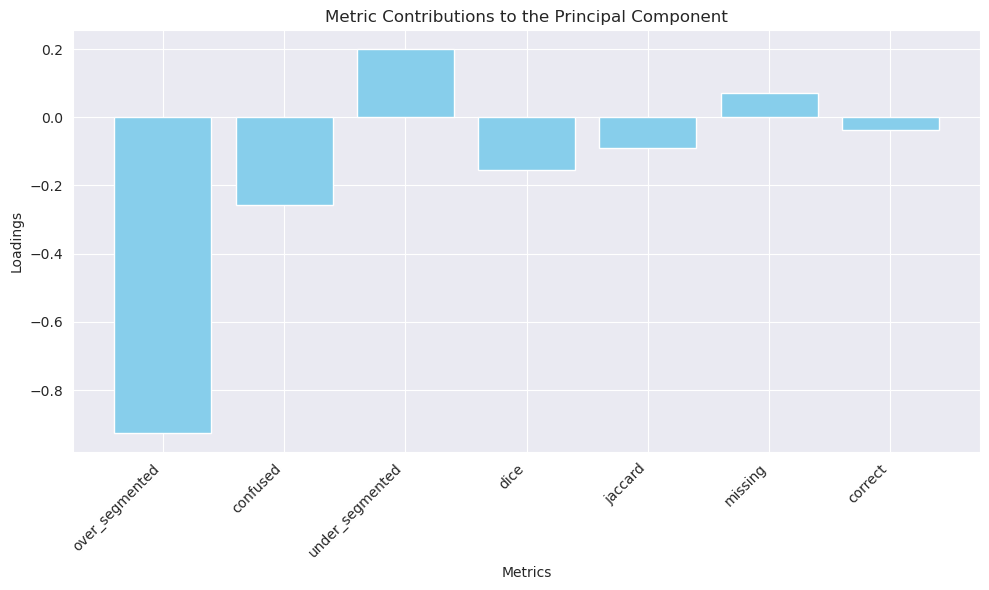

In [18]:
import matplotlib.pyplot as plt

# Sort the loadings by absolute value for better visualization
loadings_df['abs_loading'] = loadings_df['Loading'].abs()
loadings_df_sorted = loadings_df.sort_values('abs_loading', ascending=False)

# Plot the loadings
plt.figure(figsize=(10, 6))
plt.bar(loadings_df_sorted['Metric'], loadings_df_sorted['Loading'], color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Loadings')
plt.title('Metric Contributions to the Principal Component')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [19]:
cols = results.columns[1:]
cols = cols.drop(['#cells'])

for col in cols:
    results[col] = round(results[col] * 100, 3)
    
results.to_csv(v.data_path + 'SegQA/Segmentation/Nuclei/QC_CROP/Stats/results_adjusted.csv', index=False)

Violin plots 

In [21]:
dices = pd.read_csv(v.data_path + 'SegQA/Segmentation/Nuclei/QC_CROP/Dices/pipeline_3D_prob_0.1_flow_0.2_3_7.csv')
dices

,target,reference,dice
0,57,2,0.916374
1,53,3,0.945808
2,58,4,0.339487
3,58,5,0.750665
4,55,6,0.927663
...,...,...,...
172,0,147,0.000000
173,0,148,0.000000
174,0,22,0.000000
175,0,184,0.000000


In [29]:
plt.figure(figsize=(2, 4))

def violin(dices):
    # Create the violin plot for Dice coefficients
    sns.violinplot(y='dice', data=dices, inner='quartile', color='lightblue')
    sns.swarmplot(y='dice', data=dices, color='darkblue', size=3, alpha=0.5)
    
    mean_dice = dices['dice'].mean()
    plt.axhline(mean_dice, color='red', linestyle='--')
    plt.text(0, mean_dice + 0.01, f'Mean: {mean_dice:.2f}', color='red')
    
    # Add labels and title
    plt.ylabel('Dice Coefficient')
    plt.title('Distribution of Dice Coefficients')    
    

<Figure size 200x400 with 0 Axes>

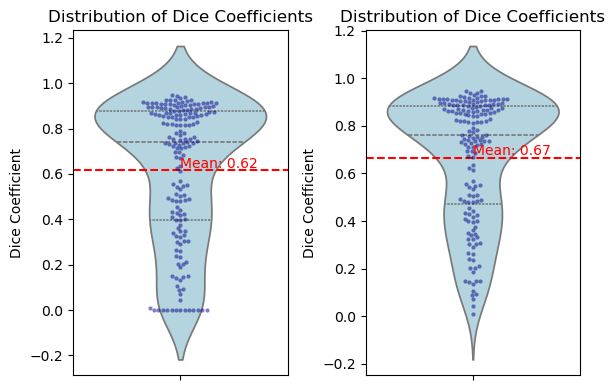

In [34]:
dices_nonzero = dices[dices['dice'] > 0]

plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1); violin(dices)
plt.subplot(1, 2, 2); violin(dices_nonzero)

plt.tight_layout()
plt.show()